In [1]:
import pandas as pd
!pip install mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data=pd.read_csv("E:\\Data Science\\book.csv",sep="\n",header=None)[0].str.split(",",expand=True)

In [3]:
#data=pd.read_csv("D:/DATA SCIENCE/DATA SCIENCE ASSIGNMENTS/Assignments/Association Rule/groceries.csv",names=['item'+str(i) for i in range(1,11)])

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,,"""User.ID""","""Book.Title""","""Book.Rating""",None,None,None,None,None,None,None,None
1,1,276726,"""Classical Mythology""",5,None,None,None,None,None,None,None,None
2,2,276729,"""Clara Callan""",3,None,None,None,None,None,None,None,None
3,3,276729,"""Decision in Normandy""",6,None,None,None,None,None,None,None,None
4,4,276736,"""Flu: The Story of the Great Influenza Pandemi...",8,None,None,None,None,None,None,None,None


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10001 non-null  object
 1   1       10001 non-null  object
 2   2       10001 non-null  object
 3   3       10001 non-null  object
 4   4       1223 non-null   object
 5   5       243 non-null    object
 6   6       72 non-null     object
 7   7       24 non-null     object
 8   8       11 non-null     object
 9   9       5 non-null      object
 10  10      1 non-null      object
 11  11      1 non-null      object
dtypes: object(12)
memory usage: 937.7+ KB


## Pre-processing

In [6]:
#As the data is not in transaction formation we using transaction formation
data=pd.get_dummies(data)
data.tail()

,0_,0_1,0_10,0_100,0_1000,0_10000,0_1001,0_1002,0_1003,0_1004,...,8_4,8_7,8_8,8_9,9_ Hollywood,9_10,9_7,9_9,"10_ and the Irrepressible Urge to Say What I Think""",11_4
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Apriori Algorithm

In [7]:
frequent_itemsets=apriori(data,min_support=0.001,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.005000,(1_1025)
1,0.002400,(1_1131)
2,0.001300,(1_1155)
3,0.005299,(1_1211)
4,0.002300,(1_1248)
...,...,...
299,0.001300,"(3_9, 1_638)"
300,0.002500,"(1_643, 3_8)"
301,0.001800,"(3_10, 1_882)"
302,0.001100,"(4_10, 3_ Book 2)"")"


In [8]:
rules=association_rules(frequent_itemsets,metric='lift')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_1025),(3_8),0.005000,0.199480,0.0011,0.220000,1.102867,0.000103,1.026308
1,(3_8),(1_1025),0.199480,0.005000,0.0011,0.005514,1.102867,0.000103,1.000517
2,(3_9),(1_1025),0.131187,0.005000,0.0015,0.011433,2.286814,0.000844,1.006508
3,(1_1025),(3_9),0.005000,0.131187,0.0015,0.300000,2.286814,0.000844,1.241162
4,(3_7),(1_1131),0.182282,0.002400,0.0012,0.006583,2.743006,0.000762,1.004211
...,...,...,...,...,...,...,...,...,...
179,(1_882),(3_10),0.004200,0.150785,0.0018,0.428571,2.842270,0.001167,1.486126
180,(4_10),"(3_ Book 2)"")",0.018598,0.003900,0.0011,0.059140,15.165564,0.001027,1.058712
181,"(3_ Book 2)"")",(4_10),0.003900,0.018598,0.0011,0.282051,15.165564,0.001027,1.366953
182,(4_7),"(3_ Book 2)"")",0.019998,0.003900,0.0012,0.060000,15.386154,0.001122,1.059681


A leverage value 0 indecates independets Range will be in [-1,1]
High convict values means that the cosequent is highly dependen on the antecedent and range [0,inf]

Text(0, 0.5, 'support')

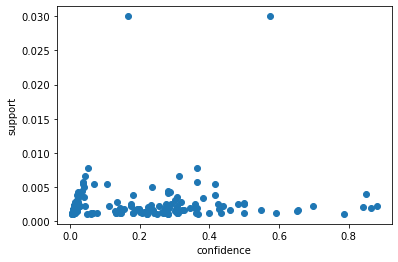

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(rules.confidence,rules.support);plt.xlabel("confidence");plt.ylabel("support")

Text(0, 0.5, 'support')

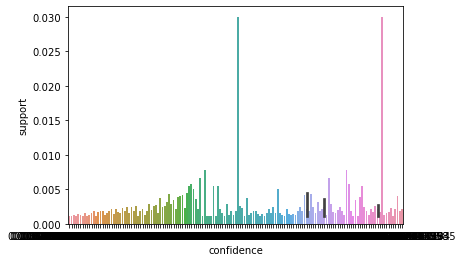

In [10]:
sns.barplot(x=rules.confidence,y=rules.support);plt.xlabel("confidence");plt.ylabel("support")

C:\Users\mihir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lift'>

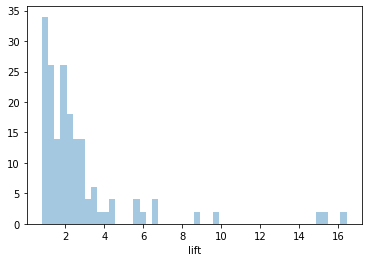

In [11]:
sns.distplot(rules.lift,bins=50,kde=False)

In [12]:
rules_confi=association_rules(frequent_itemsets,metric='confidence')
rules_confi

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_161619),(3_5),0.0025,0.089991,0.0022,0.880000,9.778756,0.001975,7.583408
1,(1_2030),(3_10),0.0047,0.150785,0.0040,0.851064,5.644224,0.003291,5.701873
2,(1_2363),(3_9),0.0022,0.131187,0.0019,0.863636,6.583252,0.001611,6.371296
3,(1_277523),(3_10),0.0025,0.150785,0.0021,0.840000,5.570849,0.001723,5.307594


Text(0, 0.5, 'support')

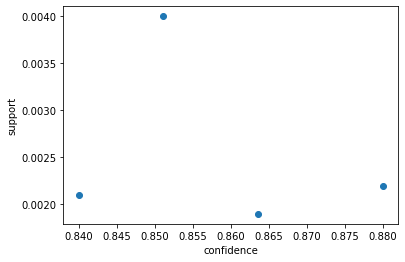

In [13]:
plt.scatter(rules_confi.confidence,rules_confi.support);plt.xlabel("confidence");plt.ylabel("support")

C:\Users\mihir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'support')

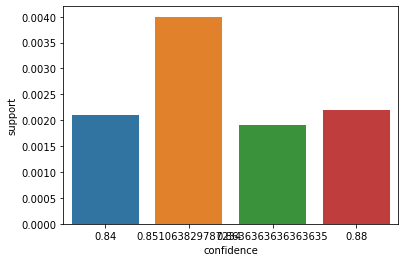

In [14]:
sns.barplot(rules_confi.confidence,rules_confi.support);plt.xlabel("confidence");plt.ylabel("support")

In [15]:
#NOW WE CHANGING min_support VALUE IN APRIORI ALGORITHM
frequent_patterns1=apriori(data,min_support=0.007,use_colnames=True)
frequent_patterns1

,support,itemsets
0,0.008899,(1_161041)
1,0.021398,(1_162052)
2,0.009099,(1_1733)
3,0.009099,(1_183)
4,0.013199,(1_2033)
5,0.010299,(1_2110)
6,0.021198,(1_2276)
7,0.007199,(1_2442)
8,0.008599,(1_2766)
9,0.014999,(1_277427)


In [16]:
rules_lift=association_rules(frequent_patterns1,metric='lift')
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(3_10),(1_162052),0.150785,0.021398,0.007799,0.051724,2.417257,0.004573,1.031980
1,(1_162052),(3_10),0.021398,0.150785,0.007799,0.364486,2.417257,0.004573,1.336265
2,(1_3757),(3_7),0.052295,0.182282,0.029997,0.573614,3.146852,0.020465,1.917788
3,(3_7),(1_3757),0.182282,0.052295,0.029997,0.164564,3.146852,0.020465,1.134384


Text(0, 0.5, 'support')

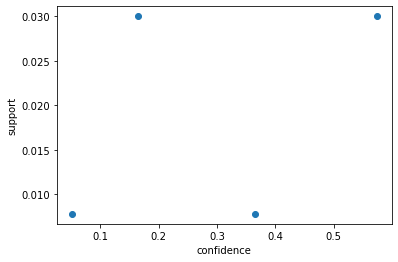

In [17]:
plt.scatter(rules_lift.confidence,rules_lift.support);plt.xlabel("confidence");plt.ylabel("support")

C:\Users\mihir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'support')

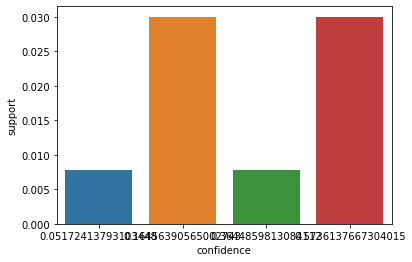

In [18]:
sns.barplot(rules_lift.confidence,rules_lift.support);plt.xlabel("confidence");plt.ylabel("support")

In [19]:
rules_confi2=association_rules(frequent_patterns1,metric='confidence')
rules_confi2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
